<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
# Data manipulation
import pandas as pd
# Connect to SQL database and implementation for a request
import psycopg2
# Parse URLs into components and work's it
import urllib.parse as req
# Visualization
import plotly.express as px
# Hiding message of user warnings  
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# Обрашаемся к таблице VACANCIES и подсчитываем кол-во уникальных id
query_3_1 = f'''select 
                    count(id) amount
                
                from VACANCIES
             '''

In [5]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_3_1 = pd.read_sql_query(query_3_1, connection)
display(df_3_1['amount'][0])

49197

<hr style="border-style: dashed;">
В основном здесь представленны вакансий по ИТ, но встречаються и такие как -  "Автор статей о спорте", "Руководитель отдела доставки", "юрист" и т.д.
<hr style="border-style: dashed;">

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# Обрашаемся к таблице EMPLOYERS и подсчитываем кол-во уникальных id
query_3_2 = f'''select 
                    count(id) amount
                
                from EMPLOYERS
             '''

In [7]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_3_2 = pd.read_sql_query(query_3_2, connection)
display(df_3_2['amount'][0])

23501

<hr style="border-style: dashed;">
Как мы видим в среднем у нас приходиться 2 заявки на одного работадателя, хотя если мы детально посмотрим, то увидим, что на крупных работадателей приходяться - сотни, иногда тысячи вакансий и бренды на слуху.  
<hr style="border-style: dashed;">


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# Обрашаемся к таблице AREAS и подсчитываем кол-во уникальных id
query_3_3 = f'''select 
                    count(id) amount
                
                from AREAS
             '''

In [9]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_3_3 = pd.read_sql_query(query_3_3, connection)
display(df_3_3['amount'][0])

1362

<hr style="border-style: dashed;">
Сразу хочу сказать, то здесь под регионом имееться виду - населенный пункт, город, область, страна. Есть достаточно необыные названия - ВНИИССОК, Яя, Другие регионы и тд.. Также представленны страны - Таджикистан, США, и др.. Если  взять в среднем, то будет около 36 вакансий на регион, но здесь мы должны понимать, что большая часть вакансий будет расположена в крупных городах, а остальные либо в небольших городах, либо за рубежом. Также представленны регионы в которых нет вакансий - возможно районы, где зарегестрирован работадатель. И около 400 районов без вакансий и зарегистрированного работадателя.
<hr style="border-style: dashed;">

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# Обрашаемся к таблице INDUSTRIES и подсчитываем кол-во уникальных id
query_3_4 = f'''select 
                    count(id) amount
                
                from INDUSTRIES
             '''

In [11]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_3_4 = pd.read_sql_query(query_3_4, connection)
display(df_3_4['amount'][0])

294

<hr style="border-style: dashed;">
Здесь у нас представленны самые разнообразные сферы деятельности: разработка, сфера услуг, промышленность, благотворительность и тд.. 
<hr style="border-style: dashed;">

***

Как мы видиели из сделанных запросов по большей части, у нас здесь представленны вакансий связанные с IT, но есть и вкрапления других направлений (юрист и тд.). Большинство работадателей у нас из Россий, хотя встречаеться ближнее зарубежье, а так же из стран расположенные на других континентах. Количество сфер деятельности, где применяется IT самое разнообразное.

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# Обрашаемся к таблице VACANCIES и AREAS
query_4_1 = f'''select 
                    count(v.id) cnt, 
                    a.name area
                
                from VACANCIES v
                   join AREAS a on v.area_id = a.id
                
                group by a.name
                
                order by cnt desc
             '''

In [13]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_4_1 = pd.read_sql_query(query_4_1, connection)
display(df_4_1)

,cnt,area
0,5333,Москва
1,2851,Санкт-Петербург
2,2112,Минск
3,2006,Новосибирск
4,1892,Алматы
...,...,...
764,1,Тарко-Сале
765,1,Новоаннинский
766,1,Бирск
767,1,Сасово


<hr style="border-style: dashed;">
Здесь мы видим, что большинство вакансий располагаеться в Россий в крупных городах евпропейской части, особенно отличается столица нашей Родины город Москва - у нее около 10.8% всех пресдставленных вакансий. В топ5 также присутствуют 2 города из-за рубежа: Минск (Республика Беларусь - 4.2%) и Алматы (Казахстан - 3.85%). Крупные города - это как правило развитые промышленные центры, и центры преоставления услуг, они аккамулируют в себе большое количество разнообразных ресурсов и поэтому 'здесь' всегда требуються в большом объеме 'рабочие руки'. Также хочу отметить, что топ5 показанных районов это около 29% всех представленных вакансий. 
Полагаю такая ситуация связанная с тем, что данные города оказались в русском HH, сложилась исторически и экономически. Как говорил Наполеон: "География - это судьба."
<hr style="border-style: dashed;">

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# Обрашаемся к таблице VACANCIES и ставим условие not null и подсчитываем строки
query_4_2 = f'''select 
                    count(*) amount
                
                from VACANCIES
                
                where 
                    salary_from is not NULL 
                    or salary_to is not NULL
             '''

In [15]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_4_2 = pd.read_sql_query(query_4_2, connection)
display(df_4_2['amount'][0])

24073

<hr style="border-style: dashed;">
Здесь у нас проблема, у половины вакансий не заполненно поле с зарплатной вилкой вообще. Если посмотреть более внимательно то окажеться, что большинство вакансий без указания ЗП при выборе какого-то параметра: это вакансий с опытом работы от 1 года до 3 лет (13.333), либо с полным рабочим днем (19.047), либо с полной занятостью (23.874).
<hr style="border-style: dashed;">

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# Обрашаемся к таблице VACANCIES и ставим условие not null и подсчитываем строки
query_4_3 = f'''select 
                    round(avg(salary_from)) low, 
                    round(avg(salary_to)) top
                
                from VACANCIES
             '''

In [17]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_4_3 = pd.read_sql_query(query_4_3, connection)
display(df_4_3)

,low,top
0,71065.0,110537.0


<hr style="border-style: dashed;">
Здесь мы видим что разница между средним уровнем, всего 40000, хотя в абсолюных цифрах минимум - 30, а максимум 1_000_000.
<hr style="border-style: dashed;">

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# Обрашаемся к таблице VACANCIES групируем по условиям и подсчитываем id
query_4_4 = f'''select 
                    schedule, 
                    employment, 
                    count(id) amount
                
                from VACANCIES
                
                group by schedule, employment
                
                order by amount desc
             '''

In [19]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_4_4 = pd.read_sql_query(query_4_4, connection)
display(df_4_4)

,schedule,employment,amount
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


<hr style="border-style: dashed;">
Особым сюрпризом не стало, что лидирует полный рабочий день, при полной занятости. Популярность 2 позиций удаленная работа, в принципе объяснима - как правило с помощью текуших технологий можно работать из любой точки мира, где есть выход в сеть, а также мировозрение на тип такого графика изменил covid.
<hr style="border-style: dashed;">

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# Обрашаемся к таблице VACANCIES групируем по условиям и подсчитываем id
query_4_5 = f'''select 
                    experience,
                    count(id) amount
                
                from VACANCIES
                
                group by experience
                
                order by amount 
             '''

In [21]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_4_5 = pd.read_sql_query(query_4_5, connection)
display(df_4_5)

,experience,amount
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


<hr style="border-style: dashed;">
Как видим в основном работадателей интересует опыт работы от 1 до 3 лет - это основные рабочие лошадки. Затем идут более опытные кандидаты с опытом от 3 до 6 лет. И видимо самые опытные, задействованы на крупных проектах, которых по сравнению с остальной массой мало.    
<hr style="border-style: dashed;">

***

Подводя кратко итоги можно сказать, что большинство вакансий требуют крупные города. В половине вакансий не указанна видка зарплаты вообще.
Средняя зарплата от 70 тысяч до 110 тысяч, вроде и выше средней по Россий (63 тысячи), но в то же время ниже средней по Москве (111 тысяч). Как видим работадатель придерживается проверенного графика работы - полного рабочего дня, но в то же время набирает популярность и удаленная работа. Также работадателям требуються и они готовы платить в основном 'рабочим лошадкам', хотя и встречаются крупные проекты где необходимы специалисты с большим опытом.  

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [22]:
# Обрашаемся к таблице VACANCIES и EMPLOYERS
query_5_1 = f'''select 
                    e.name,
                    count(v.id) v_amount
                
                from VACANCIES v 
                    join EMPLOYERS e on v.employer_id = e.id
                
                group by e.name
                
                order by v_amount desc
                
                limit 5
             '''

In [ ]:
# Или так - здесь с помощью CTE делаем подзапрос и потом из него вытаскиваем нужную 
# нам информацию, обрашаясь непосредственно к необходимым позициям
alter_query = f''' with CTE as (select 
                                    e.name employee_name,
                                    row_number() 
                                        over (order by count(e.name) desc
                                                                    ) as rn
                    
                                from VACANCIES v
                                    join employers e on v.employer_id = e.id
                                
                                group by e.name)
                    
                    select c.employee_name
                    
                    from CTE c
                    
                    where rn in (1, 5)
                '''

In [23]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_5_1 = pd.read_sql_query(query_5_1, connection)
display(df_5_1)

,name,v_amount
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331


<hr style="border-style: dashed;">
По поводу первого места, неудивительно Яндекс крупнейшая и старейшая IT компания РФ. Но также мы видим, что в топ5 входят Ростелеком (связь), 2 банка, а также и Газпром нефть (добывающая и перерабатывающая отрасль).
<hr style="border-style: dashed;">

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [24]:
# запрос, который для каждого региона выведет количество работодателей и вакансий в нём
query_5_20 = f'''select a.name,  
                       count(distinct e.id) E_amount,
                       count(distinct v.id) V_amount
                
                from AREAS a
                    left join EMPLOYERS e ON e.area = a.id
                    left join VACANCIES v ON v.area_id = a.id
                                
                group by a.id
                
                order by E_amount desc
             '''

In [25]:
# Обрашаемся к таблице AREAS, VACANCIES и EMPLOYERS
# Здесь запрос по кол-ву работадателей - вакансии по структуре такой же, надо только
# убрать условие (null). Ниже приведу скрин работадателей - вакансий
query_5_2 = f'''select a.name,  
                       count(distinct e.id) E_amount,
                       count(distinct v.id) V_amount
                
                from AREAS a
                    left join EMPLOYERS e ON e.area = a.id
                    left join VACANCIES v ON v.area_id = a.id
                
                where v.id is null
                
                group by a.id
                
                order by E_amount desc
             '''

In [26]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_5_20 = pd.read_sql_query(query_5_20, connection)# долгий запрос
display(df_5_20.head(20))
df_5_2 = pd.read_sql_query(query_5_2, connection)
display(df_5_2)

,name,e_amount,v_amount
0,Москва,5864,5333
1,Санкт-Петербург,2217,2851
2,Минск,1115,2112
3,Алматы,721,1892
4,Екатеринбург,609,1698
5,Новосибирск,573,2006
6,Казань,480,1415
7,Нижний Новгород,426,1670
8,Россия,410,0
9,Краснодар,409,1301


,name,e_amount,v_amount
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Ростовская область,18,0
...,...,...,...
588,Скидель,0,0
589,Белоозерск,0,0
590,Орловский,0,0
591,Павловская,0,0


<hr style="border-style: dashed;">
Как уже упоминалось ранее в основном работадатели из Россий, также мы видим Казахстан. Здесь мы можем предположить, что работадатели указывают в вакансий более мелкую административную единицу, чем та в которой они находятся. Например указывают субъект РФ, вместо Россия. Также возможно предлагают работу удаленно, либо в другом субъекте, а не в том в котором зарегестрированны.

Также на скриншоте выше видно соотношение работадателей - вакансий по регионам топ 20. В Москве как видим у нас превалирует число работадателей, но основной тренд прослеживается такой, что как правило число вакансий превышает число местных работадателей. Отсюда делаем вывод, либо о нехватке подготовленных специалистов на рынке, либо о том, что предлагаются работы в других регионах, а возмодно и все сразу. 
<hr style="border-style: dashed;">

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [27]:
# Обрашаемся к таблице VACANCIES (здесь можно было обойтись только данной таблицей),
# но для красоты задействуем еще название компанией EMPLOYERS
query_5_3 = f'''select 
                    e.name employer, 
                    count(distinct v.area_id) area_amount
                
                from VACANCIES v 
                    join EMPLOYERS e on v.employer_id = e.id
                    
                group by e.name 
                
                order by area_amount desc
             '''

In [28]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
# Покажем топ 15
df_5_3 = pd.read_sql_query(query_5_3, connection)
display(df_5_3.head(15))

,employer,area_amount
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,Почта России,48
9,КРОН,48


<hr style="border-style: dashed;">
Как видим более меннее известные работадатели размешают свой вакансий во многих регионах, так как у них большой бизнес и он охватывает достаточно большую територию, либо они предоставляют удаленную работу. Хотя и среди них встречаються неодназначные представители (2 и 3 индекс) - с вакансиями 'Компьютерный мастер'.  
<hr style="border-style: dashed;">

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [29]:
# Обрашаемся к таблице EMPLOYERS и EMPLOYERS_INDUSTRIES
query_5_4 = f'''select 
                    count(*) e_amout
                
                from EMPLOYERS e
                    left join EMPLOYERS_INDUSTRIES ei on ei.employer_id = e.id
                
                where ei.industry_id is null
             '''

In [30]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_5_4 = pd.read_sql_query(query_5_4, connection)
display(df_5_4['e_amout'][0])

8419

<hr style="border-style: dashed;">
Как видим около 36% работадателей не указывают сферу деятельности. Возможно это небрежность или непонимание рекрутеров, чем их компания занимается ? Либо как вариант, в глазах кандидатов, компание связанные не с IT выглядят не очень привлекательно ?
<hr style="border-style: dashed;">

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [31]:
# Обрашаемся к таблице EMPLOYERS, EMPLOYERS_INDUSTRIES и INDUSTRIES
query_5_5 = f'''select 
                    e.name, 
                    count(i.name) 
                
                from EMPLOYERS e
                    left join EMPLOYERS_INDUSTRIES ei on ei.employer_id = e.id
                    left join INDUSTRIES i on ei.industry_id = i.id
                
                group by e.name
                
                having count(i.name) = 4
                
                order by e.name 
                
                offset 2
                
                limit 1
             '''

In [32]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_5_5 = pd.read_sql_query(query_5_5, connection)
display(df_5_5['name'][0])

'2ГИС'

<hr style="border-style: dashed;">
Всего таких компаний 1136, что занимает около 5% от всех работадателей. Максимум сфер деятельности у компаний указанно 5 минимум 0.
<hr style="border-style: dashed;">

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [33]:
# Обрашаемся к таблице EMPLOYERS, EMPLOYERS_INDUSTRIES и INDUSTRIES
query_5_6 = f'''select 
                    count(e.id)
                
                from EMPLOYERS e
                    left join EMPLOYERS_INDUSTRIES ei on ei.employer_id = e.id
                    left join INDUSTRIES i on ei.industry_id = i.id
                
                Where i.name = 'Разработка программного обеспечения'
             '''

In [34]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_5_6 = pd.read_sql_query(query_5_6, connection)
display(df_5_6['count'][0])

3553

<hr style="border-style: dashed;">
На 1 месте идут компаний, у которых не обозначен вид деятельности около 36%. Далее смотря на цифры надо помнить, что компаний могут указывать не одну сферу деятельности, а до пяти как мы выяснили. 15% от всех представленных работадателей занимаються разработкой ПО. Затем с 12,7% идет системная интеграция и автоматизация, ит- консалтинг, далее с 7% Интернет-компаний далее с около 3,5% дизайнерские, рекламные и event компаний и замыкают Консалтинговые услуги c 2,8%. Ну и далее идут компаний с разнообразными родами деятельности, которые занимают 1% или меньше например - Ритуальные услуги, Рыболовство и рыбоводство. См. доп исследование внизу ноутбука.
<hr style="border-style: dashed;">

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [35]:
# У нас есть ссылка на города, но там присуствует кирилица 
# Считываем наш URL
cities = req.urlparse('https://ru.wikipedia.org/wiki/Города-миллионеры_России')
# Мы считали данные, они у нас бъются на 6 параметров (индексов), смотрим какой нам
# надо изменить (параметр path (индекс 2))
display(cities)
# С помощью quote заменяем специальные символы (кирилицу) на ASCII символы 
update = req.quote(cities[2])
# Здесь используем конструктор urljoin он находит соответсвия в параметрах и 
# конструирует URL заново вместе с преобразованным параметром
url = req.urljoin('https://ru.wikipedia.org/wiki/Города-миллионеры_России',update)
# Считываем URL страницу
tableau = pd.read_html(url)
# Просмотрев информацию мы определили что нужная нам информация находится в индексе 1, 
# в параметре "Город", переводим все это в tuple.
tpl = tuple(tableau[1]['Город'])
display(tpl)

ParseResult(scheme='https', netloc='ru.wikipedia.org', path='/wiki/Города-миллионеры_России', params='', query='', fragment='')

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Нижний Новгород',
 'Красноярск',
 'Челябинск',
 'Самара',
 'Уфа',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [36]:
# Обрашаемся к таблице VACANCIES, AREAS и EMPLOYERS
# Здесь для краткости воспользуемся подзапросом CTE, напишем наш запрос, дадим ему имя
#  и дальше по имени будем обрашаться к нему в запросах
query_5_7 = f'''with query as(select 
                                a.name, 
                                count(*) cnt
                            
                            from VACANCIES v
                                join AREAS a on v.area_id = a.id
                                join EMPLOYERS e on v.employer_id = e.id
                            
                            where e.name = 'Яндекс' 
                                  and a.name IN {tpl}
                            
                            group by a.name
                            )
                            
                select *
                
                from query
                
                union all
                
                select 'Total', sum(cnt)  
                
                from query
            '''

In [37]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_5_7 = pd.read_sql_query(query_5_7, connection)
display(df_5_7)

,name,cnt
0,Волгоград,24.0
1,Воронеж,32.0
2,Екатеринбург,39.0
3,Казань,25.0
4,Краснодар,30.0
5,Красноярск,23.0
6,Москва,54.0
7,Нижний Новгород,36.0
8,Новосибирск,35.0
9,Омск,21.0


<hr style="border-style: dashed;">
Компания Яндекс присутствует во всех крупных города РФ, но учитывая количество вакансий, которые она предоставляет это меньше половины, она также представленна в других региональных центрах. Если посмотреть другие крупные компаний, то они также представленны вакансиями в городах миллиониках, конечно не 'богато'. Это нам показывает, что таланты людей ищут по всем регионам, те компаний которые могут себе позволить. 
<hr style="border-style: dashed;">

***

Итак подведем кратко итоги. Мы увидели, что лидер по вакансиям с большим отрывом у нас IT компания 'Яндекс'. Но телеком и финтех, а также промышленность идут за ним следом, им тоже нужны специалисты IT, так как в современном мире - это позволяет извлекать дополнительную прибыль и сокращать издержки. Также мы видим, что работадатели могут быть в одном регионе, а работу предлагать в другом - здесь либо открытие филиалов, либо 'сдвиг мышления' на удаленную работу. А также как правило есть тренд, что количество вакансий в регионе больше, чем количество работадателей. Следовательно в одну и туже компанию требуеться несколько человек (нехватка специалистов или рынок переживает рост (на это может косвенно указывать, что не публикуют зарплатную вилку)!). Также крупные игроки размешаються в большом количестве регионов, как правило это компаний которые на слуху. Также мы увидели, что около 1/3 работадателей не указывают сферу деятельности у себя, что это небрежность ? Возможно это маленькие компаний, которые не заполняют полностью профиль считая это излишним или от нехватки времени (так как там на нескольких позициях может работать 1 человек). У компаний которые указывают сферы деятельности - чаще всего от 1 до 3 сфер деятельности, 4 сферы деятельности всего около 5% компаний, а 5 и более еще меньше в процентном соотношение. 15% от компаний занимаються Разработкой ПО (топ1), затем идет системный интеграторы и оптимизаторы (около 13%) и интернет компаний (около 7%), и вот 1/3 компаний всех у нас оказывается связанна непосредственно с IT, можно сказать на острие. Также крупные компаний охватывают большое количество регионов в поисках кандидатов, да в принципе благодаря интернету ивозможности удаленно работать и остальной бизнес может себе это позволить. 

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [38]:
# Обрашаемся к таблице VACANCIES, в условий ищем вхождение данных примеров
# (% - этот символ нам помогает) в слова вакансий или отдельные такие слова 
# в независмиости от регистра с помощью ключа ilike 
query_6_1 = f'''select 
                    count(*) amount

            from VACANCIES
            
            where 
                lower(name) ilike '%data%' 
                OR lower(name) ilike '%данн%'
            '''

In [39]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_6_1 = pd.read_sql_query(query_6_1, connection)
display(df_6_1['amount'][0])

1771

<hr style="border-style: dashed;">
Как мы видим из 49197 вакансий только 1771 имеет наличие данных слов или сочетаний в название вакансия, что составляет всего около 3,5%.  Если взять другие примеры - например разработка (research), то будет всего 148 вакансий.
<hr style="border-style: dashed;">

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [40]:
# Обрашаемся к таблице VACANCIES, и применяем обозначенные условия
query_6_2 = f'''select 
                    count(*) amount
                
                from VACANCIES
                
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%' 
                    or name ilike '%исследователь данных%' 
                    or (name ilike '%ML%' 
                        and name not ilike '%HTML%') 
                    or name ilike '%machine learning%'
                    or name ilike '%машинн%обучен%')
                    and (name ilike '%junior%' 
                        or experience ilike '%Нет опыта%' 
                        or employment ilike '%Стажировка%')
            '''

In [41]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_6_2 = pd.read_sql_query(query_6_2, connection)
display(df_6_2['amount'][0])

51

<hr style="border-style: dashed;">
Всего 51 вариант из около 49197 вакансий, это около 0,1 процента. Ну могу предположить, что работадателю нужны готовые специалисты, на которых не надо будем тратить ресурсы для обучения и которые уже могли поработать в данной сфере (классика :)), вакансий без джуна и тд, в 10 раз больше. Либо как вариант работадатель не указывает в название вакансий джунов, тобы иметь более богатый выбор, особенно если еще и ЗП не указанна.
<hr style="border-style: dashed;">

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [42]:
# Обрашаемся к таблице VACANCIES, и применяем обозначенные условия
# Здесь нюанс %ML% - учет вакансий в название которых есть ML (like в текущем регистре)
query_6_3 = f'''select
                    count(*) amount
            
                from VACANCIES
                
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%' 
                    or name ilike '%исследователь данных%' 
                    or (name LIKE '%ML%' 
                        and name not ilike '%HTML%') 
                    or name ilike '%machine learning%' 
                    or name ilike '%машинн%обучен%')
                    and (key_skills ilike '%SQL%' 
                        or key_skills ilike '%postgres%')
            '''

In [43]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_6_3 = pd.read_sql_query(query_6_3, connection)
display(df_6_3['amount'][0])

201

<hr style="border-style: dashed;">
Ситуация получше чем в предыдущем случае, как мы видим практически в 2/5 вакансиях требуються навыки связанные с работой в SQL. Возможно в остальных случаях работадатель имеет ввиду знание работы с SQL по дефолту или указывает в название вакансий (хотя здесь может быть пересечение с администраторами sql и т.д.)
<hr style="border-style: dashed;">

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [44]:
# Обрашаемся к таблице VACANCIES, и применяем обозначенные условия
query_6_4 = f'''select
                    count(*) amount
            
                from VACANCIES
                
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%' 
                    or name ilike '%исследователь данных%' 
                    or (name LIKE '%ML%' 
                        and name not ilike '%HTML%') 
                    or name ilike '%machine learning%' 
                    or name ilike '%машинн%обучен%')
                    and key_skills ilike '%Python%'
            '''

In [45]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_6_4 = pd.read_sql_query(query_6_4, connection)
display(df_6_4['amount'][0])

351

<hr style="border-style: dashed;">
Навык владения Python намного популярнее более половины вакансий DS имеют его в ключевых навыках, в остальных С++, Java и т.д. (я посмотрел)
<hr style="border-style: dashed;">

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [46]:
# Обрашаемся к таблице VACANCIES, и применяем обозначенные условия
# lenght - подсчитываем количество символов в строке, затем replace убираем символ
# CHR(9) (в данном случае символ разделения между навыками), считаем разницу и узнаем 
# кол-во CHR(9) и прибавляем + 1 узнаем - кол-во навыков в строке
query_6_5 = f'''select 
                    round(avg(length(key_skills)-length(replace(key_skills, 
                                                        CHR(9), ''))+1), 2)
                from VACANCIES
            
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%' 
                    or name ilike '%исследователь данных%' 
                    or (name LIKE '%ML%' 
                        and name not ilike '%HTML%') 
                    or name ilike '%machine learning%' 
                    or name ilike '%машинн%обучен%')
                    and key_skills is not NULL
            '''

In [47]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_6_5 = pd.read_sql_query(query_6_5, connection)
display(df_6_5['round'][0])

6.41

<hr style="border-style: dashed;">
В среднем 6.41 ключевых навыков на вакансию чуть больше чем в среднем по всем предоставленным вакансиям (6.37).
<hr style="border-style: dashed;">

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [48]:
# Обрашаемся к таблице VACANCIES, и применяем обозначенные условия
# Используем coalesce, он возврашает 1-е значение, которое имеет not null,
# В данной строке 3 позиций - он смотрит каждую и если видит что там нет NULL, то
# возврашает ее, сумма у нас поставленна 1 значением - т/к если там все ок, то она и
# возврашается. Если есть проблемы, то идем дальше и смотрим там (в where у нас 
# указанно, что что-то будет без NULL)
query_6_6 = f'''select round(avg(coalesce((salary_from+salary_to)/2, 
                                                salary_from, salary_to, 0)))
                from VACANCIES
                
                where (name ilike '%data scientist%' 
                    or name ilike '%data science%' 
                    or name ilike '%исследователь данных%' 
                    or (name like '%ML%' 
                        AND name not ilike '%HTML%') 
                    or name ilike '%machine learning%' 
                    or name ilike '%машинн%обучен%')
                    and (salary_from is not NULL 
                        or salary_to is not NULL)
                    and experience = 'От 3 до 6 лет'
            '''

In [49]:
# Используем метод read_sql_query, чтобы получить результаты сразу в виде датафрейма
df_6_6 = pd.read_sql_query(query_6_6, connection)
display(df_6_6)

,round
0,243115.0


<hr style="border-style: dashed;">
Как видим в среднем по рынку ЗП достаточно приятная, но это с учетом регионов думаю в Москве и других крупных городах ЗП будет побольше.
<hr style="border-style: dashed;">

***

Как мы узнали всего 1771(3,5%) вакансии имеют отношения к данным. Также мы посмотрели вакансий DS (536 строк) из них вакансии джунов явно указанных в название всего 51 (0,1%) от обшего кол-во вакансии. С бнавыками SQL у нас работают 2/5 из вакансий DS 201 строка, в этом плане Python популярнее 351 строка, больше половины указывают этот ключевой навык. Так же средний показатель по количеству ключевых навыков 6.41 превышает средний показатель ключевых навыков во всех вакансиях 6.37. Это показывает, что для вхождения в данные направления деятельности, необходимо предпринимать больше усилий. Ну и вишенкой на торт будет ЗП в среднем выше по рынку после 3 лет работы в данной области. 

# Общий вывод по проекту

# подведем итог исследования

- Как мы видиели из сделанных запросов по большей части, у нас здесь представленны вакансий связанные с IT, но есть и вкрапления других направлений (юрист и тд.). Большинство работадателей у нас из Россий, хотя встречаеться ближнее зарубежье, а так же из стран расположенные на других континентах всего 1362 региона. Количество сфер деятельности, где применяется IT самое разнообразное.
- Большинство вакансий ориентированно на крупные города. Около половины вакансий без указания заработной вилке, в остальных может быть заполнена только одна позиция. Средняя зарплата в предоставленных вакансиях от 70 тысяч до 110 тысяч. Работадатель  в основном желает, чтобы кандидаты работали полный рабочий день, но также мы видим, что на втором месте по графику рабочего дня идет удаленная работа. Работадателям требуються уже достаточно опытные специалисты. В среде самих работадателей, лидер по вакансиям с большим отрывом у нас IT компания 'Яндекс'. Но телеком и финтех, а также промышленность идут за ним следом, им тоже нужны специалисты IT, так как в современном мире - это позволяет извлекать дополнительную прибыль и сокращать издержки. 
- Сами работадатели могут быть в одном регионе, а работу предлагать в другом - здесь либо открытие филиалов, либо удаленная работу. Также как есть тренд, что количество вакансий в регионе больше, чем количество работадателей. Следовательно в одну и туже компанию требуеться несколько человек (нехватка специалистов или рынок переживает рост (на это может косвенно указывать, что не публикуют зарплатную вилку)!). Крупные игроки размешаються в большом количестве регионов - это компаний которые на слуху, хотя не обходится и без казусов здесь. Около 1/3 работадателей не указывают сферу деятельности у себя, что это небрежность ? Возможно это маленькие компаний, которые не заполняют полностью профиль считая это излишним или от нехватки времени (так как там на нескольких позициях может работать 1 человек). 
- У компаний которые указывают сферы деятельности - чаще всего от 1 до 3 сфер деятельности, 4 сферы деятельности всего около 5% компаний, а 5 и более еще меньше в процентном соотношение. 15% работадателей занимаються Разработкой ПО (топ1), затем идет системный интеграторы и оптимизаторы (около 13%) и интернет компаний (около 7%), около 1/3 работадателей связанна непосредственно с IT отраслью. Крупные компаний охватывают большое количество регионов в поисках кандидатов, чтобы выборка и возможностей было больше.
- Всего 1771(3,5%) вакансии имеют отношения к данным. Если посмотреть вакансий DS, то всего будет 536 - из них вакансии джунов явно указанных в название всего 51 (0,1%). С навыками SQL у нас работают 2/5 из вакансий DS, в этом плане Python популярнее там больше половину указанн этот ключевой навык. Так же средний показатель по количеству ключевых навыков превышает средний показатель ключевых навыков в вакансии. Это показывает, что для вхождения в данные направления деятельности, необходимо предпринимать больше усилий. Ну и вишенкой на торт будет ЗП она будет выше по рынку после 3 лет работы в данной области разница будет 3,5 раза.
***

Если говорить о дальнейшем исследование, то можно дальше углубиться, в детали посмотреть соотношение и сделать некоторые выводы. Можем просмотреть зависимость ЗП от навыков и опыта работы. Также посмотреть какие компаний сейчас набирают DS, а какие нет. Также узнать куда следует обрашаться 'неофитам' и где их с большей вероятностью возмут, а где возмут с меньшей вероятностью.  

In [50]:
# посмотрим связь зарплаты с опытом и навыками
# здесь применим подсчет навыков с заменой NULL на 1 и 2, так как затем это нам даст
# 1-2+1 = 0. В итоге там где не обозначены навыки мы получим 0
heatmap = f'''select 
                experience, 
                (length(coalesce(key_skills, '1')) - length(
                    replace(coalesce(key_skills, ' 2'), CHR(9), '')))::int 
                                                                + 1 skills,
                coalesce((salary_from+salary_to)/2, salary_from,
                                                        salary_to, 0) salary
                from VACANCIES
                
                where
                    salary_from is not null 
                    or salary_to is not null

                order by skills 
            '''

In [51]:
df_heatmap = pd.read_sql_query(heatmap, connection)
display(df_heatmap)

,experience,skills,salary
0,От 3 до 6 лет,0,135000
1,От 3 до 6 лет,0,95000
2,Нет опыта,0,75000
3,От 1 года до 3 лет,0,69000
4,Нет опыта,0,15000
...,...,...,...
24068,От 1 года до 3 лет,30,180000
24069,От 1 года до 3 лет,30,40000
24070,Нет опыта,30,36000
24071,От 1 года до 3 лет,30,70000


In [52]:
# Сделаем сводную таблицу, чтобы подсчитать срднию ЗП для опыта и кол-во скилов
pivot_heatmap = pd.pivot_table(
                                data = df_heatmap,
                                values = 'salary',
                                index = 'experience',
                                columns = 'skills',
                                aggfunc='median'
                                )
display(pivot_heatmap)

skills,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
experience,,,,,,,,,,,,,,,,,,,,,
Более 6 лет,110000.0,145000.0,113000.0,170000.0,150000.0,122047.0,215000.0,192880.0,110000.0,117500.0,...,220000.0,130807.0,266635.0,150000.0,315000.0,NaN,NaN,60000.0,NaN,51427.0
Нет опыта,26000.0,38000.0,35000.0,37500.0,36000.0,40000.0,40000.0,38832.5,36000.0,60000.0,...,30000.0,66000.0,56250.0,NaN,75000.0,35500.0,35500.0,90000.0,NaN,30000.0
От 1 года до 3 лет,55000.0,55000.0,60000.0,60000.0,60000.0,60000.0,65000.0,65000.0,67171.0,65000.0,...,65000.0,102500.0,60000.0,50000.0,66250.0,60000.0,40000.0,42500.0,82500.0,46250.0
От 3 до 6 лет,100000.0,135000.0,176658.5,120000.0,116897.0,100000.0,125000.0,123000.0,120000.0,115000.0,...,212500.0,115000.0,85433.0,100000.0,150000.0,150000.0,200000.0,122500.0,175346.0,86000.0


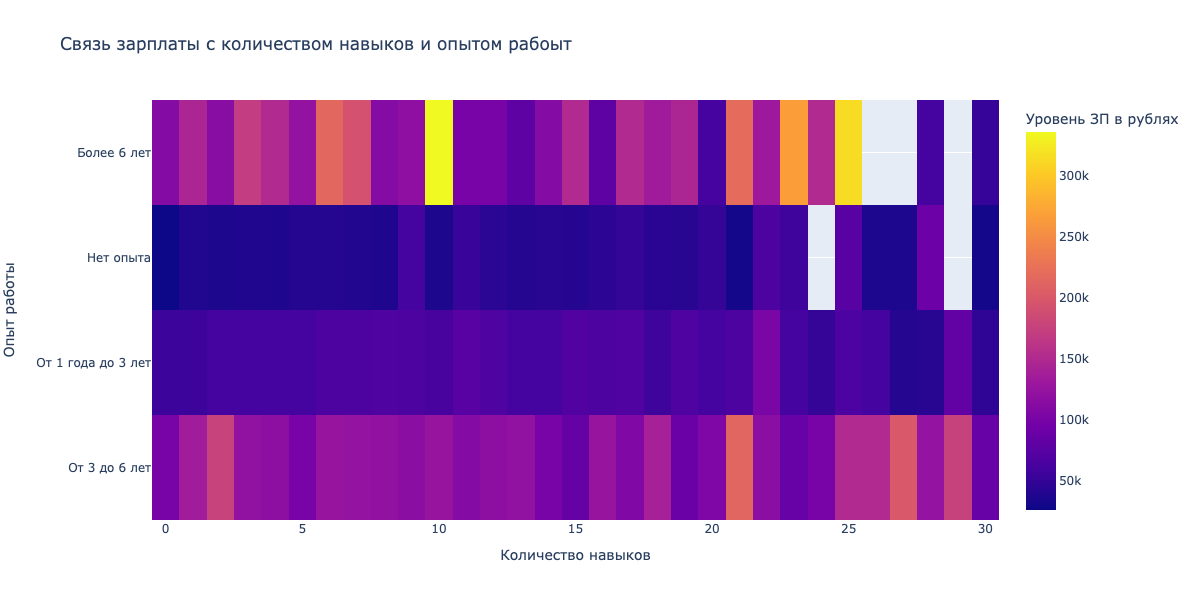

In [53]:
# Нарисуем таблицу в тепловой карте
fig = px.imshow(pivot_heatmap, # датафрейм
                # изменение контраста (сейчас используються экстремумы)
                labels=dict(color="Уровень ЗП в рублях",x='Количество навыков',
                           y='Опыт работы'),
                title='Связь зарплаты с количеством навыков и опытом рабоыт',
                # изменение контраста (сейчас используються экстремумы)
                contrast_rescaling='minmax',
                width = 1200, # Ширина графика
                height = 600
               )
# Вывод графика
fig.show('png')

Как видим в количестве навыков нет какого либо ярко выраженного тренда, на зарплату влияет больше опыт работы.

In [54]:
# Распределение по experience заполнености вилки зарплат и средние зарплаты
experience_salary = f'''select 
                            experience,
                            count(*) amount,
                            round(avg(coalesce((salary_from+salary_to)/2, 
                                                salary_from, salary_to, 0)))
                
                        from VACANCIES
                
                        where 
                            salary_from is not NULL 
                            or salary_to is not NULL
                
                        group by experience 
                
                        order by amount desc
                    '''

In [55]:
exp_sal = f'''select 
                experience,
                count(*) amount
            
            from VACANCIES
                                
            group by experience 
                
            order by amount desc
        '''

In [56]:
df_exp_sal = pd.read_sql_query(experience_salary, connection)
display(df_exp_sal)
df_exp_salf = pd.read_sql_query(exp_sal, connection)
display(df_exp_salf)

,experience,amount,round
0,От 1 года до 3 лет,12819,76541.0
1,От 3 до 6 лет,5649,133211.0
2,Нет опыта,5055,40472.0
3,Более 6 лет,550,166256.0


,experience,amount
0,От 1 года до 3 лет,26152
1,От 3 до 6 лет,14511
2,Нет опыта,7197
3,Более 6 лет,1337


В первом датафрейме видим, самые часто заполняемые вилки зарплат, а также их среднию заработную плату. Во втором выводится распределение вакансии по опыту работы. Как видим в половине случаев 49% указывают хотябы частично вилку при опыте работы от 1 года 3 лет, от 3 до 6 лет уже указывают только около в 40% случаев, при отстутсвие опыта уже указывают зп в 70% случаев, и при опыте более 6 лет указывают только в 40% случаев. Ну здесь мы видим тенденцию к тому что с опытом все меньше указывают зарплаты. Видимо есть примерная планка зарплат специалистов такого уровня и чем опытнее онистановятся, при +- одинаковых зарплатах начинают влиять другие бонусы ?

In [57]:
# min и max зарплатной вилки
min_max = f'''select 
                    min(salary_from),
                    max(salary_to)
                
            from VACANCIES
                 
            '''

In [58]:
df_min_max = pd.read_sql_query(min_max, connection)
display(df_min_max)

,min,max
0,30,1000000


Когда мы смотрели работодателя и количество регионов, в которых он публикует свои вакансии. У нас попались 2 работадателя которые публиковались во многих регионах но были неизвестны - Спецремонт	(116) и Поляков Денис Иванович	(88). Посмотрим кто это такие и чем занимаються.

In [59]:
specification = f'''select 
                        e.name firm,
                        v.name vacancy,
                        v.key_skills,
                        v.schedule,
                        v.experience,
                        v.salary_from,
                        v.salary_to,
                        i.name activities,
                        a.name area_v
                    
                    from VACANCIES v
                        left join EMPLOYERS e on v.employer_id = e.id
                        left join employers_industries ei 
                                                    on e.id = ei.employer_id 
                        left join industries i on ei.industry_id = i.id
                        left join areas a on v.area_id = a.id
                    
                    where 
                        e.name = 'Спецремонт' 
                        or e.name = 'Поляков Денис Иванович'
                    
                    group by firm, vacancy, v.key_skills, v.schedule, 
                                v.experience, v.salary_from, v.salary_to,
                                activities, area_v
                    
                    order by firm
                '''

In [60]:
df_specification = pd.read_sql_query(specification, connection)
display(df_specification)

,firm,vacancy,key_skills,schedule,experience,salary_from,salary_to,activities,area_v
0,Поляков Денис Иванович,Компьютерный мастер,Навыки продаж\tНавыки работы с возражениями\tУ...,Полный день,От 1 года до 3 лет,70000,NaN,None,Тула
1,Поляков Денис Иванович,Компьютерный мастер,Техники продаж\tУверенный пользователь ПК\tРем...,Сменный график,От 1 года до 3 лет,60000,NaN,None,Орел
2,Поляков Денис Иванович,Компьютерный мастер,Техники продаж\tУверенный пользователь ПК\tРем...,Сменный график,От 1 года до 3 лет,60000,NaN,None,Симферополь
3,Поляков Денис Иванович,Компьютерный мастер,Техники продаж\tУверенный пользователь ПК\tРем...,Сменный график,От 1 года до 3 лет,60000,NaN,None,Тамбов
4,Поляков Денис Иванович,Компьютерный мастер,Техники продаж\tУверенный пользователь ПК\tРем...,Сменный график,От 1 года до 3 лет,60000,NaN,None,Томск
...,...,...,...,...,...,...,...,...,...
270,Спецремонт,Ученик компьютерного мастера,Ремонт ПК\tАктивные продажи\tОбучение персонал...,Сменный график,Нет опыта,80000,NaN,None,Орск
271,Спецремонт,Ученик компьютерного мастера,Ремонт ПК\tАктивные продажи\tОбучение персонал...,Сменный график,Нет опыта,80000,NaN,None,Петропавловск-Камчатский
272,Спецремонт,Ученик компьютерного мастера,Ремонт ПК\tАктивные продажи\tОбучение персонал...,Сменный график,Нет опыта,85000,NaN,None,Южно-Сахалинск
273,Спецремонт,Ученик компьютерного мастера,Ремонт ПК\tАктивные продажи\tОбучение персонал...,Сменный график,Нет опыта,75000,NaN,None,Елец


Как видим название вакансий Компьютерный мастер, либо Ученик компьютерного мастера. Мне сразу напоминает листовки на на дверях подъездов -  "Живу рядом, приду быстро, пенсионерам скидки". И навыки специфические - Навыки продаж, Навыки работы с возражениями. Набирают народ без опыта, либо с опытом от 1 года до 3 лет. Денег предлагают от 40 000 до 150 000. Сфера деятельности не указана. Но можно найти на этом сайте - https://egrul.nalog.ru/index.html. У Поляков Денис Иванович - найдем целых 7 видов деятельности, а вот организаций с названием Спецремонт по РФ достаточно много и не все из них занимаються деятельностью связанной с IT. С ИНН было бы проще найти.

In [61]:
activities = f'''select
                    i.name activities ,
                    count(e.id)

                from EMPLOYERS e
                    left join EMPLOYERS_INDUSTRIES ei on ei.employer_id = e.id
                    left join INDUSTRIES i on ei.industry_id = i.id
                
                group by activities
                
                order by count(e.id) desc
              '''

In [62]:
df_activities = pd.read_sql_query(activities, connection)
display(df_activities)

,activities,count
0,None,8419
1,Разработка программного обеспечения,3553
2,"Системная интеграция, автоматизации технологи...",2993
3,"Интернет-компания (поисковики, платежные систе...",1675
4,"Маркетинговые, рекламные, BTL, дизайнерские, E...",798
...,...,...
290,Ритуальные услуги,4
291,"Лифтовое хозяйство (монтаж, сервис, ремонт)",4
292,Автошкола,3
293,"Ботанический сад, зоопарк, заповедник",3


Некоторыми результатами исследования я поделился в основном теле проекта.Ну а здесь можно наглядно посмотреть.

In [63]:
# количество клучевых скилов в среднем, также max и min
key_skills = f'''select 
                    'average'things,
                    round(avg(length(key_skills)-length(replace(key_skills, 
                                            CHR(9), ''))+1), 2) calculating
                from VACANCIES
                
                where key_skills is not NULL
                
                union all
                
                select
                    'min',
                    min(length(key_skills)-length(replace(key_skills, 
                                                        CHR(9), ''))+1)
                from VACANCIES
                
                where key_skills is not NULL
                
                union all 
                
                 select
                    'max',
                    max(length(key_skills)-length(replace(key_skills, 
                                                        CHR(9), ''))+1)
                from VACANCIES
                
                where key_skills is not NULL
            '''

In [64]:
df_skills = pd.read_sql_query(key_skills, connection)
display(df_skills)

,things,calculating
0,average,6.37
1,min,1.00
2,max,30.00


In [ ]:
# закрываем соединение
connection.close()